In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to the ZIP file in Google Drive
zip_path = 'https://drive.google.com/file/d/1YvdQ0lsa5aqWB9OaLETU4oAfSDJckp5y/view?usp=sharing'  # Replace with the actual path to your ZIP file

In [ ]:
import zipfile
import os
import gdown

# Step 1: Download the file from Google Drive
# Replace the part after 'id=' in the URL with the actual file ID.
file_id = '1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY'
zip_file_path = '/content/plant.zip'

# Downloading the file using gdown
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', zip_file_path, quiet=False)

# Step 2: Extract the zip file
extract_dir = '/content/plant'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify extracted files
os.listdir(extract_dir)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY
From (redirected): https://drive.google.com/uc?export=download&id=1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY&confirm=t&uuid=99fc174d-142b-499a-8668-5b081fd409c7
To: /content/plant.zip
100%|██████████| 1.49G/1.49G [00:28<00:00, 52.5MB/s]


['Plant_Disease_Dataset', '__MACOSX']

In [ ]:
# Create training and validation sets
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

Found 17572 files belonging to 38 classes.


In [ ]:
# Load the EfficientNet model with pretrained weights
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model layers

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Add custom classification layers on top
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
dense_layer = tf.keras.layers.Dense(1024, activation='relu')
dropout_layer = tf.keras.layers.Dropout(0.4)
output_layer = tf.keras.layers.Dense(38, activation='softmax')  # 38 classes

In [ ]:
# Build the model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = dense_layer(x)
x = dropout_layer(x)
outputs = output_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,400,265 (20.60 MB)

 Trainable params: 1,350,694 (5.15 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
# Train the model
training_history = model.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 184s 72ms/step - accuracy: 0.7095 - loss: 1.2287 - val_accuracy: 0.9517 - val_loss: 0.1935
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9350 - loss: 0.2285 - val_accuracy: 0.9652 - val_loss: 0.1279
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 123s 56ms/step - accuracy: 0.9551 - loss: 0.1517 - val_accuracy: 0.9711 - val_loss: 0.1008
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.9654 - loss: 0.1152 - val_accuracy: 0.9759 - val_loss: 0.0819
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 122s 55ms/step - accuracy: 0.9714 - loss: 0.0942 - val_accuracy: 0.9772 - val_loss: 0.0740
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 56ms/step - accuracy: 0.9758 - loss: 0.0809 - val_accuracy: 0.9798 - val_loss: 0.0656
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 124s 56ms/step - accuracy: 0.9791 - loss: 0.0696 - val_accuracy: 0.9803 - val_loss: 0.0622
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 

In [ ]:
# Evaluate training and validation accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 104s 47ms/step - accuracy: 0.9941 - loss: 0.0243
Training accuracy: 0.9943950772285461


In [ ]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.9841 - loss: 0.0510
Validation accuracy: 0.9845208525657654


In [ ]:
!pip install tensorflow
!pip install matplotlib

In [ ]:
# Save the trained model
model.save('trained_plant_disease_efficientnet_model.keras')

In [ ]:
# Record training history
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

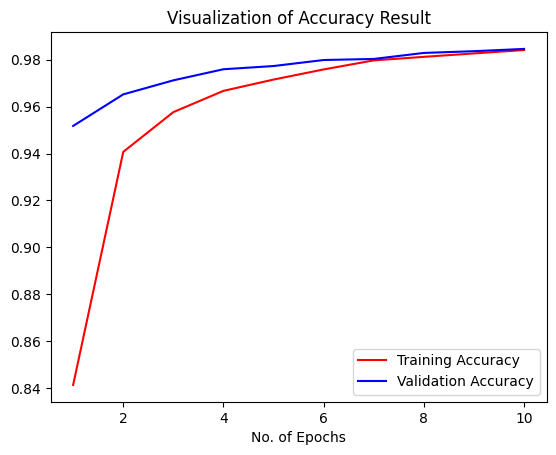

In [ ]:
# Plot accuracy history
epochs = range(1, 11)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
# Prediction and evaluation
class_name = validation_set.class_names
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=1,
    shuffle=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 140s 8ms/step


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.98      0.99       504
                                 Apple___Black_rot       0.98      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.99      1.00      1.00       440
                                   Apple___healthy       0.99      0.99      0.99       502
                               Blueberry___healthy       1.00      1.00      1.00       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.95      0.96       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.97      0.

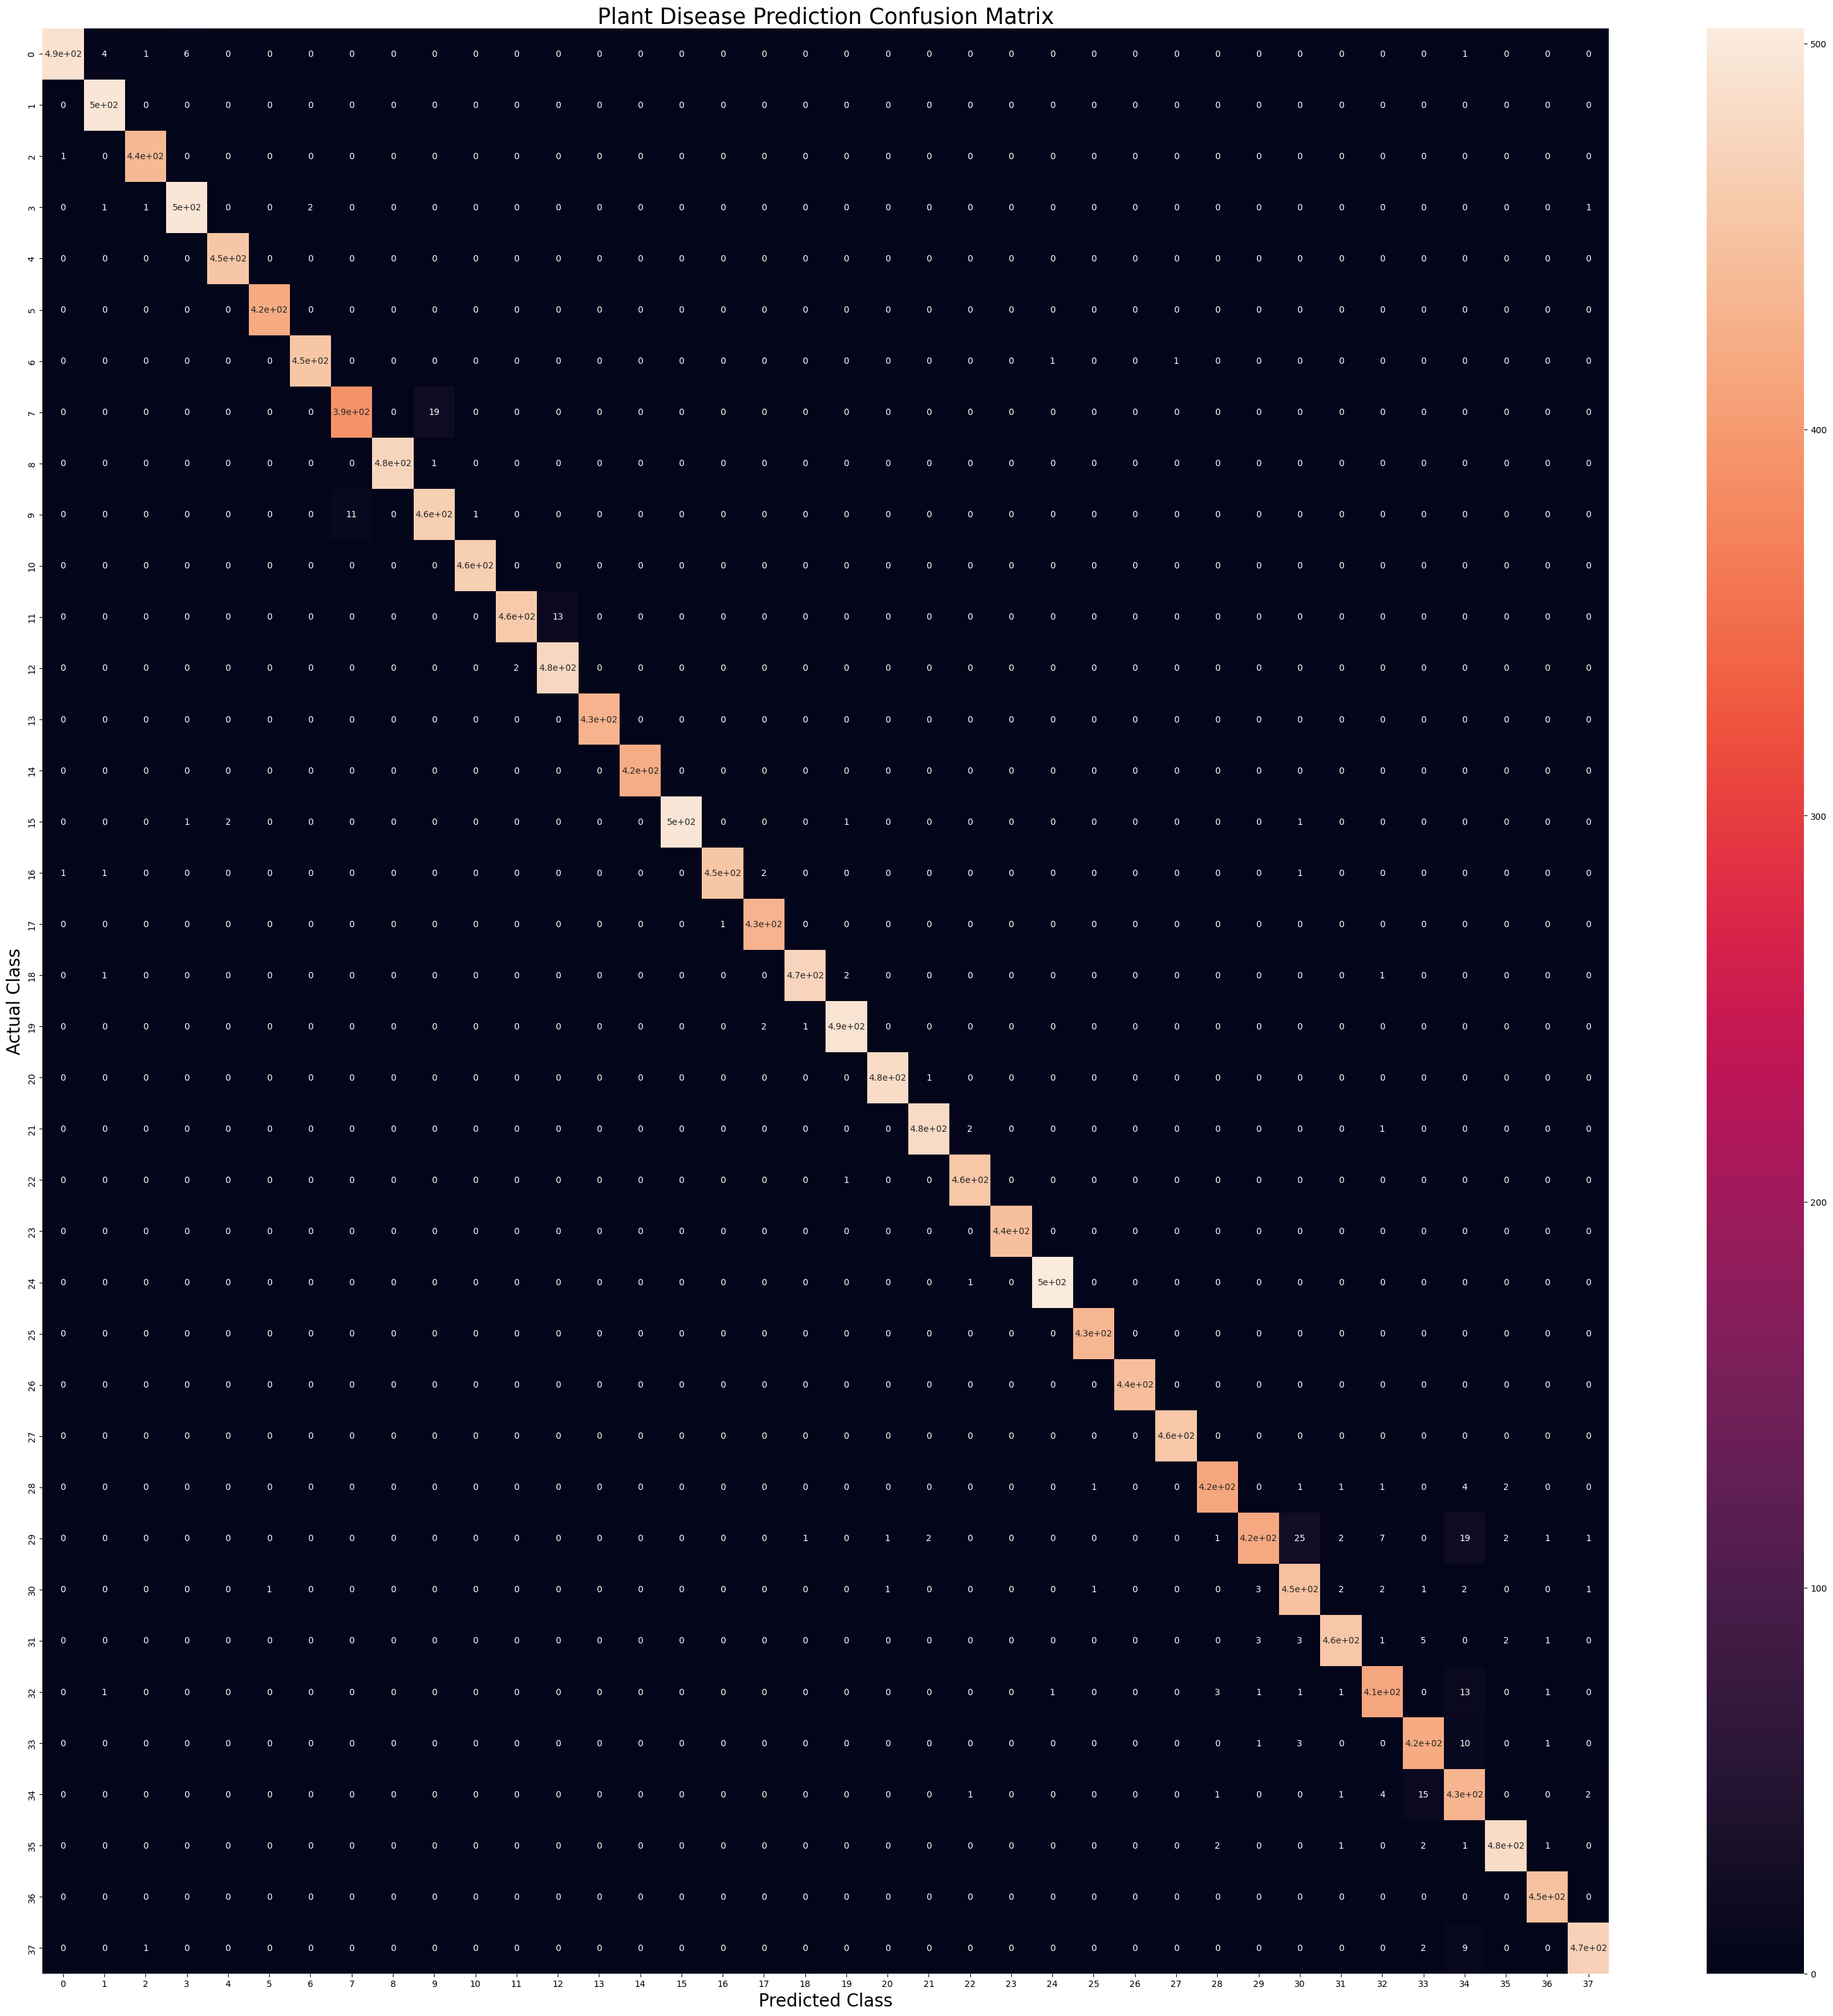

In [ ]:
# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_name))

plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()